# Sales Analysis Exercise

### Questions:
- What was the best month for sale? How much was earned that month?
- What city sold the most products?
- What time should we display advertisements to maximize the likelihood of purchases?
- What products are most often sold together?
- What product sold the most? Why do you think it did?¶

### Useful Functions
- info()
- isnull()
- dropna()
- groupby()[]
- apply()
- transform() (similar to apply)
- lambda
- to_datetime()
- count()
- duplicated(keep=__)
- drop_duplicates()

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

## Data Importing

### Merge Sales data into csv

In [2]:
# concatenating all sales csv
files = [file for file in os.listdir('./Sales_Data')]

allData = pd.DataFrame()

for f in files:
    data = pd.read_csv('./Sales_Data/' + f)
    allData = pd.concat([allData, data])
    
allData.head()

# save as csv file
allData.to_csv("merged_data.csv", index = False)

### Read merged data from new csv

In [3]:
allDataCSV = pd.read_csv('merged_data.csv')
allDataCSV

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Data Preparation

### Check for null values

In [4]:
allDataCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
allDataCSV.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### Drop NA rows

In [6]:
dataCleaned = allDataCSV.dropna()
dataCleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Check for any more null values

In [7]:
dataCleaned.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Remove rows with 'Or' in 'Order Date'

In [8]:
dataCleaned = dataCleaned[dataCleaned['Order Date'].str[0:2] != 'Or']

# check if 'Or' is removed
if 'Or' in dataCleaned['Order Date'].str[0:2]:
    print('Failed')
else:
    print('success')

success


### Convert 'Quantity Ordered' and 'Price Each' to integer and float respectively

In [9]:
dataCleaned['Quantity Ordered'] = dataCleaned['Quantity Ordered'].astype('int')
dataCleaned['Price Each'] = dataCleaned['Price Each'].astype('float')

<ipython-input-9-496b277cabcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleaned['Quantity Ordered'] = dataCleaned['Quantity Ordered'].astype('int')
<ipython-input-9-496b277cabcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleaned['Price Each'] = dataCleaned['Price Each'].astype('float')


### Convert 'Order Date' to datetime format

In [10]:
dataCleaned['Order Date'] = pd.to_datetime(dataCleaned['Order Date'])

<ipython-input-10-b7e0c895949c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleaned['Order Date'] = pd.to_datetime(dataCleaned['Order Date'])


In [11]:
dataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 14.2+ MB


## QN 1: What was the best month for sale? How much was earned that month?

### Add month column

In [12]:
dataCleaned['month'] = pd.to_datetime(dataCleaned['Order Date']).dt.month
dataCleaned.head()

<ipython-input-12-51c7f5a7c50b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleaned['month'] = pd.to_datetime(dataCleaned['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Convert month type string to integer

In [13]:
# invalid literal for int() with base 10: 'Or'
# need to remove rows with 'Or' in Data Preparation
dataCleaned['month'] = dataCleaned['month'].astype('int')
dataCleaned

<ipython-input-13-55b7f3c61253>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleaned['month'] = dataCleaned['month'].astype('int')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


### Add Sales Column

In [14]:
# can't multiply sequence by non-int of type 'str'
# 
dataCleaned['Sales'] = dataCleaned['Quantity Ordered'] * dataCleaned['Price Each']
dataCleaned

<ipython-input-14-1b547f885bd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleaned['Sales'] = dataCleaned['Quantity Ordered'] * dataCleaned['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


### Use groupby() and sum()

In [15]:
qnOne = dataCleaned.groupby('month').sum()
qnOne

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Plot bar graph

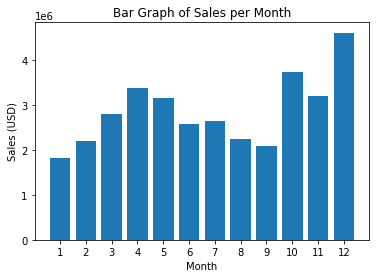

In [16]:
months = range(1, 13)
figsize=(19,10)
plt.bar(months, qnOne['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.title('Bar Graph of Sales per Month')
plt.show()

- December was the best month for sales
- The Christmas Holiday during December might have increased the sales the most in December

## QN 2: What city had the highest sales?

### Add City Column

### Use apply()

In [17]:
def getCity(addr):
    # lambda 1: split 'Purchase Address' by comma and get [1] index
    # Some cities in USA have the same name, so adding the state makes them unique
    # lambda 2: split 'Purchase Address' by comma and get [2] index, and split [2] index by space and get its [1] index
    city = f"{addr.split(',')[1]} ({addr.split(',')[2].split(' ')[1]})"
    return city

dataCleaned['City'] = dataCleaned['Purchase Address'].apply(lambda x: getCity(x))
dataCleaned

<ipython-input-17-ebb161296306>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleaned['City'] = dataCleaned['Purchase Address'].apply(lambda x: getCity(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


### Use groupby() and sum()

In [18]:
qnTwo = dataCleaned.groupby('City').sum()
qnTwo

,Quantity Ordered,Price Each,month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


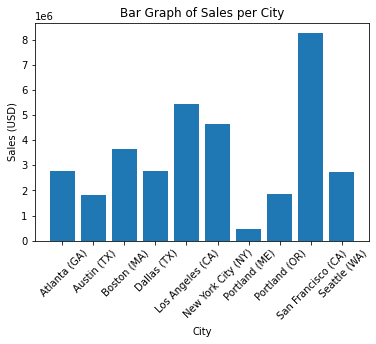

In [19]:
cities = [city for city, df in dataCleaned.groupby('City')]
figsize=(19,10)
plt.bar(cities, qnTwo['Sales'])
plt.xticks(cities, rotation = 45)
plt.xlabel('City')
plt.ylabel('Sales (USD)')
plt.title('Bar Graph of Sales per City')
plt.show()

- San Francisco has the highest sales

## QN 3: What city has the highest quantity ordered?

In [20]:
# sql: select city group by quantity ordered
qnThree = dataCleaned.groupby('City')['Quantity Ordered'].count()
qnThree.sort_values(ascending = False)

City
 San Francisco (CA)    44732
 Los Angeles (CA)      29605
 New York City (NY)    24876
 Boston (MA)           19934
 Atlanta (GA)          14881
 Dallas (TX)           14820
 Seattle (WA)          14732
 Portland (OR)         10010
 Austin (TX)            9905
 Portland (ME)          2455
Name: Quantity Ordered, dtype: int64

- San Francisco sold the most number of products ordered

## QN 4: What time should we display advertisements to maximize the likelihood of purchases?

### Get hour and minute from datetime value

In [21]:
dataCleaned['Hour'] = pd.to_datetime(dataCleaned['Order Date']).dt.hour
dataCleaned['Minute'] = pd.to_datetime(dataCleaned['Order Date']).dt.minute
dataCleaned

<ipython-input-21-5be05239f922>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleaned['Hour'] = pd.to_datetime(dataCleaned['Order Date']).dt.hour
<ipython-input-21-5be05239f922>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleaned['Minute'] = pd.to_datetime(dataCleaned['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


In [22]:
# count no. of rows for each hour
hours = [hour for hour, df in dataCleaned.groupby('Hour')]
dataCleaned.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


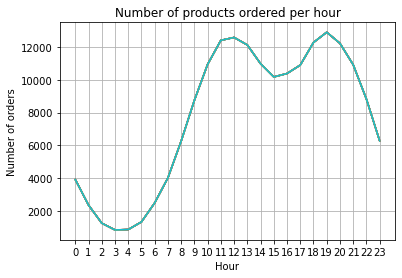

In [23]:
plt.plot(hours, dataCleaned.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.title('Number of products ordered per hour')
plt.show()

- The number of orders were the highest at 12pm and 7pm, which indicates a rising level of users around those time periods
- This means that most users will be online and will see the advertisements displayed
- Therefore, advertisements should be displayed around 12am and 7pm

## QN 5: What products are most often sold together? 

### Get duplicated order ids to find products that are bought together

In [24]:
dup = dataCleaned[dataCleaned['Order ID'].duplicated(keep=False)]
dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49


### Join product names with same order id in new column

In [25]:
dup['Products Grouped'] = dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dup

<ipython-input-25-c26b999a78b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['Products Grouped'] = dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,Products Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49,"Google Phone,USB-C Charging Cable"


### Drop duplicated Order IDs

In [26]:
# dropping duplicate rows with same order id and products grouped
dup = dup[['Order ID', 'Products Grouped']].drop_duplicates()
dup

,Order ID,Products Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


### Count number of rows for each grouped product

In [27]:
count = Counter()

for row in dup['Products Grouped']:
    row_list = row.split(',')
    # count products sold in pairs
    count.update(Counter(combinations(row_list, 2)))
count

Counter({('Google Phone', 'Wired Headphones'): 414,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 27,
         ('AAA Batteries (4-pack)', 'Google Phone'): 11,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
         ('Apple Airpods Headphones', 'ThinkPad Laptop'): 9,
         ('Bose SoundSport Headphones', 'AAA Batteries (4-pack)'): 37,
         ('34in Ultrawide Monitor', 'Google Phone'): 2,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
         ('AAA Batteries (4-pack)', '27in FHD Monitor'): 22,
         ('USB-C Charging Cable', 'AAA Batteries (4-pack)'): 45,
         ('iPhone', 'Wired Headphones'): 447,
         ('iPhone', '27in 4K Gaming Monitor'): 6,
         ('ThinkPad Laptop', 'AAA Batteries (4-pack)'): 16,
         ('iPhone', 'Apple Airpods Headph

In [28]:
# get top 10 pair of products sold together
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## QN 6: What product sold the most? Why do you think it did?

In [29]:
prod = dataCleaned.groupby('Product')
quant = prod.sum()['Quantity Ordered']

pr = [product for product, df in prod]

# get mean prices of each product sold
price = dataCleaned.groupby('Product').mean()['Price Each']
price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

### Plot graph with secondary y axis

<ipython-input-30-d702fe4319c1>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


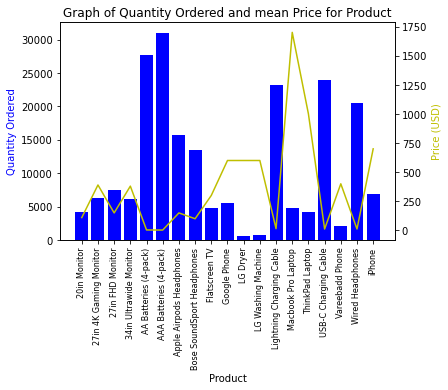

In [30]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(pr, quant, color='b')
ax2.plot(pr, price, color='y')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price (USD)', color='y')
ax1.set_xticklabels(pr, rotation=90, size=8)
plt.title('Graph of Quantity Ordered and mean Price for Product')

fig.show()

- The product that had the highest number of orders is AAA Batteries
- This may be due to the low prices of AAA Batteries
- There is an inverse relationship between the quantity ordered and prie of some products (AA Batteries, AAA Batteries, Lightning Charging Cable, USB-C Charging Cable, Wired Headphones
<br><br>
- Macbook Pro Laptop has the highest mean price
- Macbook Prop Laptops have high prices and are popular in some IT circles